In [1]:
import numpy as np
import pandas as pd
import pygeostat as gs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import subprocess as sp
%pylab inline --no-import-all
from subprocess import check_output
import tensorflow as tf
from tensorflow.python import debug as tf_debug
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn import preprocessing
import scipy.spatial as scs
import scipy as sc
import math
from scipy.spatial import distance
from sklearn.metrics import mean_squared_error
import time
from sklearn.metrics import r2_score
from random import randrange

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


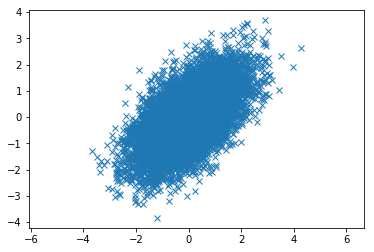

In [2]:
mean = [0,0]
cov = [[1,0.6],[0.6,1]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [3]:
z = np.zeros(len(x))
for i in range(0, len(x)):
    z[i] =  math.exp(-1.5*math.pow(x[i],2)*math.pow(y[i],2))

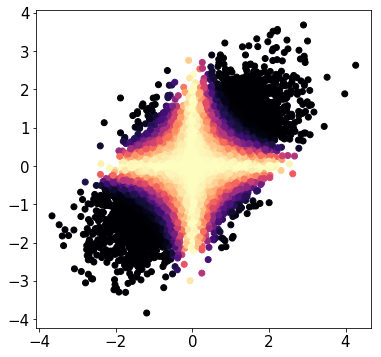

In [4]:
SMALL_SIZE = 15
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
f, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_aspect('equal', 'box')
plt.scatter(x,y,c = z,cmap='magma')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Simulated Data')
# plt.xlim(-4,4)
# plt.ylim(-4,4)
# plt.colorbar()
# plt.text(-3.5,3.0,r'ndata = 10000')
# plt.savefig('C:/Users/Matt/Desktop/Thesis Work/Thesis/0-Figures/3-Chapter/SimData.png')


In [5]:
np.cov(x,y)

array([[0.97579236, 0.58111017],
       [0.58111017, 0.9719412 ]])

In [6]:
randidx = np.random.randint(10000, size=2000)

In [7]:
np.shape(randidx)

(2000,)

In [8]:
data_x = np.vstack((x[randidx],y[randidx])).T
data_y = (z[randidx])

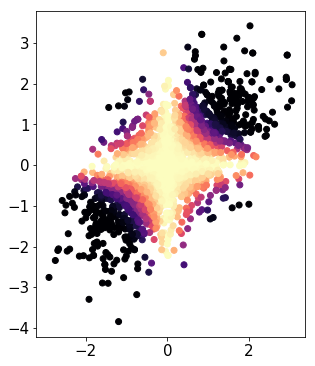

In [9]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(data_x[:,0],data_x[:,1],c = data_y,cmap='magma')
ax.set_aspect('equal', 'box')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Sampled Data')
# plt.xlim(-4,4)
# plt.ylim(-4,4)
# plt.text(-3.5,3.0,r'ndata = 2000')
# plt.colorbar()
# plt.savefig('C:/Users/Matt/Desktop/Thesis Work/Thesis/0-Figures/3-Chapter/SampleData.png')
plt.show()

In [10]:
data_train, data_test, target_train, target_test = train_test_split(data_x,data_y, test_size=.20, 
                                                                    shuffle = True, random_state = 42)

In [11]:
data_train = np.reshape(data_train,[data_train.shape[0],2])
data_test = np.reshape(data_test,[data_test.shape[0],2])
target_train = np.reshape(target_train,[target_train.shape[0],1])
target_test = np.reshape(target_test,[target_test.shape[0],1])
x_pred = np.hstack((x.reshape(len(x),1),y.reshape(len(y),1))).reshape(len(x),2)
z = np.reshape(z,[z.shape[0],1])

In [12]:
# f, ax = plt.subplots(1, 1, figsize=(6, 6))
# plt.scatter(data_train[:,0],data_train[:,1],c = target_train.reshape(len(target_train)),cmap='magma')
# plt.colorbar()
# ax.set_aspect('equal', 'box')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Train Data')
# plt.xlim(-4,4)
# plt.ylim(-4,4)
# plt.text(-3.5,3.0,r'ndata = 1600')
# plt.savefig('C:/Users/Matt/Desktop/Thesis Work/Thesis/0-Figures/3-Chapter/Train_set.png')
# plt.show()

In [13]:
data_train.shape

(1600, 2)

In [14]:
# f, ax = plt.subplots(1, 1, figsize=(6, 6))
# plt.scatter(data_test[:,0],data_test[:,1],c = target_test.reshape(len(target_test)),cmap='magma')
# plt.colorbar()
# ax.set_aspect('equal', 'box')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Test Data')
# plt.xlim(-4,4)
# plt.ylim(-4,4)
# plt.text(-3.5,3.0,r'ndata = 400')
# plt.savefig('C:/Users/Matt/Desktop/Thesis Work/Thesis/0-Figures/3-Chapter/test_set.png')
# plt.show()

Working on Node 1 fold 1 
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Matt\\AppData\\Local\\Temp\\tmprouke9g9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D20F384EF0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Queue-based input pipelines have been replaced by 

Epoch: 800/7500 err = 0.029791157692670822
Cost_test : 0.039415512
R^2:0.7978760600090027
Epoch: 900/7500 err = 0.02897574007511139
Cost_test : 0.0390569
R^2:0.7928136587142944
Epoch: 1000/7500 err = 0.03122747503221035
Cost_test : 0.03961548
R^2:0.7751470804214478
Epoch: 1100/7500 err = 0.030004553496837616
Cost_test : 0.039567046
R^2:0.7891044020652771
Epoch: 1200/7500 err = 0.028506042435765266
Cost_test : 0.03927982
R^2:0.7957713007926941
Epoch: 1300/7500 err = 0.02753489464521408
Cost_test : 0.039657123
R^2:0.8109816908836365
Epoch: 1400/7500 err = 0.030867228284478188
Cost_test : 0.039305087
R^2:0.783520519733429
Epoch: 1500/7500 err = 0.03525642305612564
Cost_test : 0.039334822
R^2:0.7519960403442383
Epoch: 1600/7500 err = 0.03139086812734604
Cost_test : 0.039375674
R^2:0.7826735973358154
Epoch: 1700/7500 err = 0.027939818799495697
Cost_test : 0.039485347
R^2:0.8066235780715942
Epoch: 1800/7500 err = 0.03187255933880806
Cost_test : 0.03941284
R^2:0.7777420282363892
Epoch: 1900/7

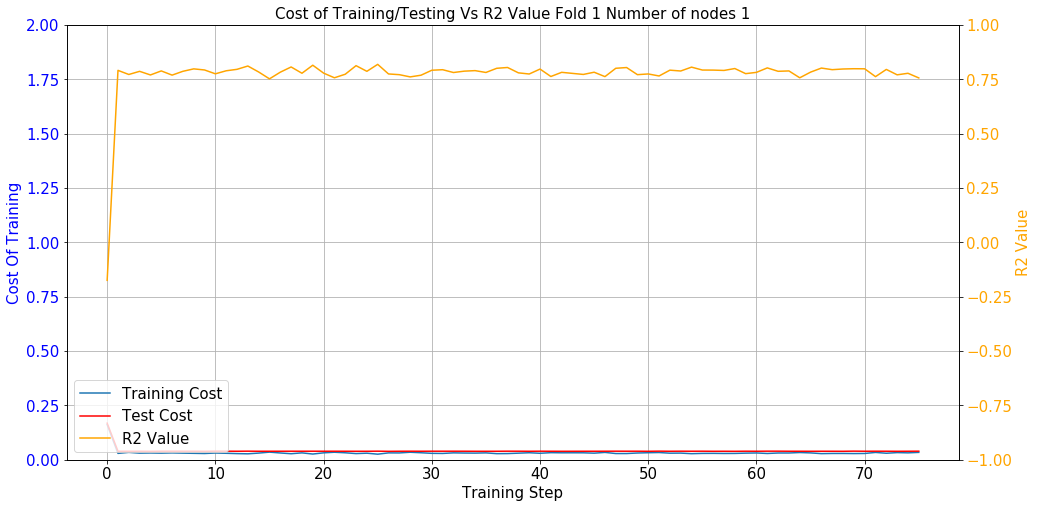

In [15]:
fold_num = 1
row = 0
NN = 'RBFN' # RBFN or GRNN or 'EBFN'
data_type = 'Continuous' # Continuous or Categorical
test_nodes = [1]
pred_all_RBFN = np.zeros((len(test_nodes)*y.shape[0],target_train.shape[1]))
info_matrix = np.zeros((len(test_nodes),8))
n_batch = 1
for nodes in test_nodes:
    c_t = []
    c_test = []
    c_r2 = []
    start_time = time.time()
    print("Working on Node {} fold {} ".format(nodes,fold_num))
    k = nodes
    data_trainpd = pd.DataFrame(data_train)
    data = data_trainpd

    with tf.device('/device:CPU:0'):
        #clustering
        def input_fn():
          return tf.train.limit_epochs(
              tf.convert_to_tensor(data_train, dtype=tf.float32), num_epochs=1)

        kmeans = tf.contrib.factorization.KMeansClustering(
            num_clusters=nodes, use_mini_batch=False)


        # train
        num_iterations = 10
        previous_centers = None
        for _ in range(num_iterations):
          kmeans.train(input_fn)
          cluster_centers = kmeans.cluster_centers()
          #if previous_centers is not None:
            #print('delta:', cluster_centers - previous_centers)
          previous_centers = cluster_centers
          #print('score:', kmeans.score(input_fn))
        #print('cluster centers:', cluster_centers)


    with tf.device('/device:GPU:0'):
        from tensorflow.python.framework import ops
        ops.reset_default_graph()


        RANDOM_SEED = 42
        tf.set_random_seed(RANDOM_SEED)

        N_INSTANCES = np.shape(data_train)[0]
        N_INPUT = data_train.shape[0]
        N_FEATURE = data_train.shape[1]
        N_CLASSES = target_train.shape[1]
        TRAIN_SIZE = int(N_INSTANCES)
        batch_size = int(np.shape(data_train)[0]/n_batch)
        training_epochs = 7500
        if nodes >= 5:
            training_epochs = 5000
        if nodes >= 25:
            training_epochs = 5000
        if nodes >= 100:
            training_epochs = 5000
        if nodes >= 1000:
            training_epochs = 5000
        learning_rate = 0.01
        epsilon = 0.001
        display_step = 100
        hidden_size = nodes

        target_ = np.zeros((N_INSTANCES, N_CLASSES))
        extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

        x_data = tf.placeholder(shape=[None, N_FEATURE], dtype=tf.float32, name = 'Features')
        y_target = tf.placeholder(shape=[None, N_CLASSES], dtype=tf.float32, name = 'Known_Values')


        dist = np.zeros((k,k))
        for i in range (0,k):
            for j in range (0,k):
                dist[i:j] = distance.euclidean(cluster_centers[i], cluster_centers[j])
                maxdist = dist.max()
        sigma = maxdist/np.sqrt(2*k)
        if nodes == 1 :
            beta = 0.2
        else:        
            beta = 1/math.pow(2*sigma,2)

        #EBFN
        if NN == 'RBFN':
            def rbf_network(input_layer, cluster_centers ,weights):

                exp_list= []
                with tf.name_scope('Input_Layer'):
                    input_layer
                #yy = tf.convert_to_tensor(np.asarray(cluster_centers).reshape(nodes,N_FEATURE), dtype=tf.float32)
                with tf.name_scope('Cluster_Centers'):
                    yy = weights['cluster_centers']

                for i in range(nodes):
                    with tf.name_scope('Euclidean_Dist'):
                        cc_i = yy[i]
                        euclidean_dist = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(input_layer, cc_i)), 1))


                    with tf.name_scope('Gaussian_Activation_Layer'):
                        gauss_f = tf.math.exp((-tf.math.pow((weights['beta'][:,i]*euclidean_dist), 2)))


                        exp_list.append(gauss_f)
                with tf.name_scope('Output_Layer'):        
                    layer2_act = tf.stack(exp_list)   
                    output = tf.add(tf.matmul(layer2_act, weights['output'],transpose_a=True,name = 'mult_layer2_by_weights'), bias['output'], 
                                name = 'add_bias_to_output')     
                return output

        weights = {
            'h1': tf.Variable(tf.ones([N_FEATURE, N_FEATURE,nodes]), name = 'layer1_dims'),
            'output': tf.Variable(tf.ones([nodes, N_CLASSES]), name = 'layer2_output_Weights'),
            'cov_mat': tf.Variable(tf.ones(shape = [N_FEATURE,N_FEATURE,nodes]), name = 'cov'),
            'beta' : tf.Variable(tf.constant(beta,shape = [1,nodes]) ,name = 'r'),            
            'cluster_centers' : tf.Variable(tf.constant(np.asarray(cluster_centers).reshape(nodes,N_FEATURE),
                                shape = [nodes,N_FEATURE]), name = 'cluster_center')
        }

        bias = {
            'output' : tf.Variable([0],name='output_bias',dtype=tf.float32)  
        }


        pred = rbf_network(x_data, cluster_centers ,weights)

        if data_type == 'Continuous':
            with tf.name_scope('cost'):
                cost = tf.reduce_mean(tf.square(pred - y_target))
                #cost = tf.math.reduce_sum(tf.square(pred - y_target)) 
                my_opt = tf.train.AdamOptimizer(learning_rate,beta1=0.5).minimize(cost)  
                tf.summary.scalar('cost', cost)

            with tf.name_scope('accuracy'):
                total_error = tf.reduce_sum(tf.square(tf.subtract(y_target, tf.reduce_mean(y_target))))
                unexplained_error = tf.reduce_sum(tf.square(tf.subtract(y_target, pred)))
                accuracy = tf.subtract(1.00, tf.divide(unexplained_error, total_error))

        if data_type == 'Categorical':
            with tf.name_scope('cost'):
                if N_CLASSES == 1:
                    cost = tf.reduce_mean(tf.square(tf.round(pred) - y_target)) 
                else:
                    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y_target, logits = pred))
                my_opt = tf.train.AdamOptimizer(learning_rate).minimize(cost) 
                tf.summary.scalar('cost', cost)

            with tf.name_scope('accuracy'):
                correct_prediction = tf.equal(tf.round(pred), y_target)
                accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


#             tf.summary.histogram("cov_mat", weights['cov_mat'])
#             tf.summary.histogram("Weights_Output_Layer", weights['output'])
#             tf.summary.histogram("Bias_Output_Layer", bias['output'])




        init = tf.global_variables_initializer()
        sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))
        merged = tf.summary.merge_all()
        saver = tf.train.Saver()
        writer = tf.summary.FileWriter('./test',sess.graph)
        sess.run(init)
        tol = 0.00001
        epoch, err, acc=0, 1, 0
        # Training loop
        #saver.restore(sess,'./spatial/test_dataset_{}.ckpt'.format(nodes))
        while epoch <= training_epochs and err >= tol and acc <= 0.99:

            avg_cost = 0.
            acc = 0.
            total_batch = int(data_train.shape[0] / batch_size)
            for i in range(total_batch):
                randidx = np.random.randint(int(TRAIN_SIZE), size=batch_size)
                batch_xs = data_train[randidx , :]
                batch_ys = target_train[randidx , :]
                sess.run(my_opt, feed_dict={x_data: batch_xs, y_target: batch_ys})
                avg_cost += sess.run(cost, feed_dict={x_data: batch_xs, y_target: batch_ys})/total_batch
                acc += sess.run(accuracy, feed_dict={x_data: batch_xs, y_target: batch_ys})/total_batch
            err = avg_cost
            if epoch % 100 == 0:
                #summary = sess.run([merged],feed_dict={x_data: batch_xs, y_target: batch_ys})
                #writer.add_summary(summary,epoch)
                print("Epoch: {}/{} err = {}".format(epoch, training_epochs, avg_cost))
                print('Cost_test :',sess.run(cost, feed_dict={x_data:data_test,y_target:target_test}))
                c_t.append(avg_cost)
                c_test.append(sess.run(cost, feed_dict={x_data:data_test,y_target:target_test}))
                c_r2.append(acc)
                if data_type == 'Categorical': 
                    print("Accuracy:{}".format(acc))
                else:
                    print("R^2:{}".format(acc))    

            epoch +=1

        print ("End of learning process")
        print ("Final epoch = {}/{} ".format(epoch, training_epochs))
        print ("Final error = {}".format(err) )
        print ("Final R^2 = {}".format(acc) )
        saver.save(sess,'./spatial/test_dataset_{}_{}.ckpt'.format(nodes,fold_num))
        w = x.shape[0]
        pred1 = np.zeros((x_pred.shape[0],N_CLASSES))
        f_pred1 = np.zeros((x_pred.shape[0],10))
        for i in range(0,1):
            #print(i)
            pred1[i*w:(1+i)*w,0:N_CLASSES] = (sess.run(pred, feed_dict={x_data:x_pred}))
            pred_all_RBFN[i*w+(row*y.shape[0]):(1+i)*w+(row*y.shape[0]),0:N_CLASSES] = pred1[i*w:(1+i)*w,0:N_CLASSES]

        writer = tf.summary.FileWriter("sess_graph", sess.graph)
        saver.save(sess,'test/test_dataset_{}_{}.ckpt'.format(nodes,fold_num))
        sess.close() 
        row += 1
        tf.InteractiveSession.close(sess)
    print(info_matrix)
    SMALL_SIZE = 15
    plt.rc('font', size=SMALL_SIZE)
    plt.rc('axes', titlesize=SMALL_SIZE)
    f, (ax1) = plt.subplots(1, 1,figsize=(16, 8))
    ax1.set_ylim([0,2])
    ax1.plot(range(len(c_t)), c_t, label ='Training Cost')
    ax1.plot(range(len(c_t)), c_test, color="red",label ='Test Cost')
    ax1.set_xlabel('Training Step')
    ax1.grid(True)
    ax1.set_title('Cost of Training/Testing Vs R2 Value Fold {} Number of nodes {}'.format(fold_num,nodes))
    ax1.set_ylabel('Cost Of Training', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2 = ax1.twinx()
    ax2.plot(range(len(c_t)), c_r2,'-',color="orange",label ='R2 Value')
    ax2.set_ylim([-1,1])
    ax2.set_ylabel('R2 Value', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=3)
    plt.show()


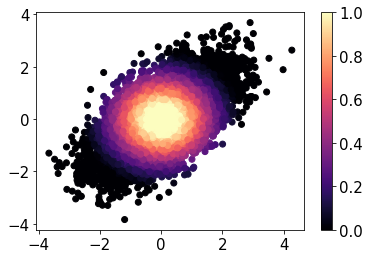

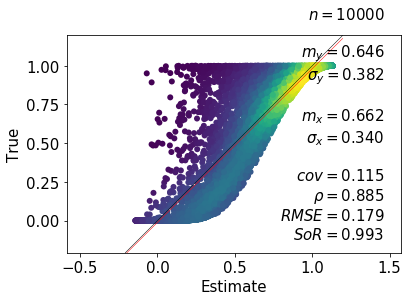

In [16]:
plt.scatter(x,y,c = np.reshape(pred_all_RBFN[0:10000,:],[len(pred_all_RBFN[0:10000,:])]),cmap='magma',vmin = 0, vmax = 1)
plt.colorbar()
gs.scatxval(pd.DataFrame(pred_all_RBFN[0:10000,:]),pd.DataFrame(z),dens=True)

Working on Node 1 fold 1 
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Matt\\AppData\\Local\\Temp\\tmpxk4yp09l', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D263E93CF8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO

Epoch: 1100/7500 err = 0.007128059398382902
Cost_test : 0.0071577253
R^2:0.9502190351486206
Epoch: 1200/7500 err = 0.007823792286217213
Cost_test : 0.007741509
R^2:0.9453601837158203
Epoch: 1300/7500 err = 0.007810921873897314
Cost_test : 0.007733526
R^2:0.9454500675201416
Epoch: 1400/7500 err = 0.007819167338311672
Cost_test : 0.0077369786
R^2:0.9453924894332886
Epoch: 1500/7500 err = 0.007844197563827038
Cost_test : 0.0077595566
R^2:0.9452176690101624
Epoch: 1600/7500 err = 0.00784305203706026
Cost_test : 0.007754944
R^2:0.9452256560325623
Epoch: 1700/7500 err = 0.007804007735103369
Cost_test : 0.007728332
R^2:0.9454983472824097
Epoch: 1800/7500 err = 0.007950728759169579
Cost_test : 0.007849452
R^2:0.9444736838340759
Epoch: 1900/7500 err = 0.007818066515028477
Cost_test : 0.007739773
R^2:0.9454001784324646
Epoch: 2000/7500 err = 0.007870095781981945
Cost_test : 0.0077833156
R^2:0.9450368285179138
Epoch: 2100/7500 err = 0.007810583338141441
Cost_test : 0.007733121
R^2:0.9454524517059

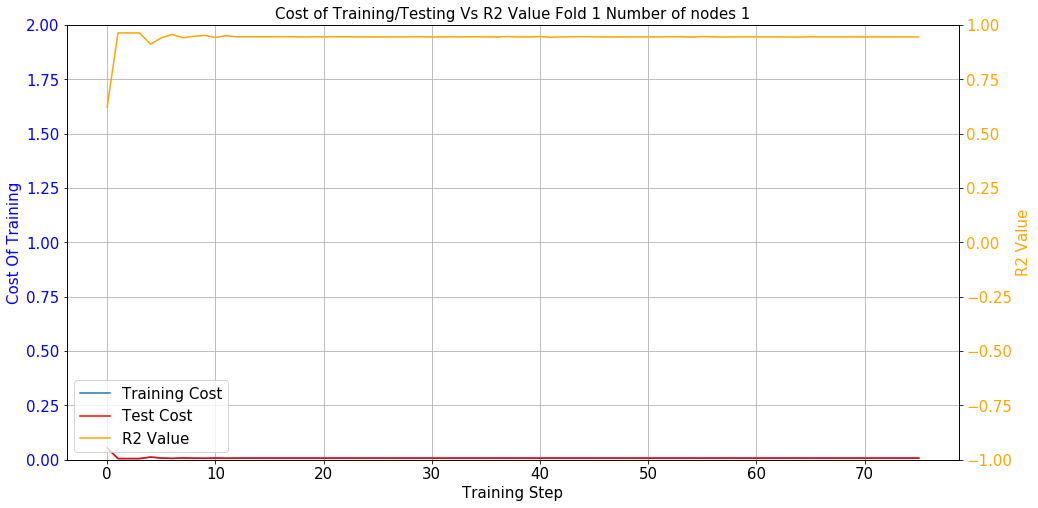

In [17]:
fold_num = 1
row = 0
NN = 'RBFN' # RBFN or GRNN or 'EBFN'
data_type = 'Continuous' # Continuous or Categorical
test_nodes = [1]
pred_all_ERBFN = np.zeros((len(test_nodes)*y.shape[0],target_train.shape[1]))
info_matrix = np.zeros((len(test_nodes),8))
n_batch = 1
for nodes in test_nodes:
    c_t = []
    c_test = []
    c_r2 = []
    start_time = time.time()
    print("Working on Node {} fold {} ".format(nodes,fold_num))
    k = nodes
    data_trainpd = pd.DataFrame(data_train)
    data = data_trainpd

    with tf.device('/device:CPU:0'):
        #clustering
        def input_fn():
          return tf.train.limit_epochs(
              tf.convert_to_tensor(data_train, dtype=tf.float32), num_epochs=1)

        kmeans = tf.contrib.factorization.KMeansClustering(
            num_clusters=nodes, use_mini_batch=False)


        # train
        num_iterations = 10
        previous_centers = None
        for _ in range(num_iterations):
          kmeans.train(input_fn)
          cluster_centers = kmeans.cluster_centers()
          #if previous_centers is not None:
            #print('delta:', cluster_centers - previous_centers)
          previous_centers = cluster_centers
          #print('score:', kmeans.score(input_fn))
        #print('cluster centers:', cluster_centers)


    with tf.device('/device:GPU:0'):
        from tensorflow.python.framework import ops
        ops.reset_default_graph()


        RANDOM_SEED = 42
        tf.set_random_seed(RANDOM_SEED)

        N_INSTANCES = np.shape(data_train)[0]
        N_INPUT = data_train.shape[0]
        N_FEATURE = data_train.shape[1]
        N_CLASSES = target_train.shape[1]
        TRAIN_SIZE = int(N_INSTANCES)
        batch_size = int(np.shape(data_train)[0]/n_batch)
        training_epochs = 7500
        if nodes >= 5:
            training_epochs = 5000
        if nodes >= 25:
            training_epochs = 5000
        if nodes >= 100:
            training_epochs = 5000
        if nodes >= 1000:
            training_epochs = 5000
        learning_rate = 0.1
        #epsilon = 0.001
        display_step = 100
        hidden_size = nodes

        target_ = np.zeros((N_INSTANCES, N_CLASSES))
        extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

        x_data = tf.placeholder(shape=[None, N_FEATURE], dtype=tf.float32, name = 'Features')
        y_target = tf.placeholder(shape=[None, N_CLASSES], dtype=tf.float32, name = 'Known_Values')


        dist = np.zeros((k,k))
        for i in range (0,k):
            for j in range (0,k):
                dist[i:j] = distance.euclidean(cluster_centers[i], cluster_centers[j])
                maxdist = dist.max()
        sigma = maxdist/np.sqrt(2*k)
        if nodes == 1 :
            beta = 0.2
        else:        
            beta = 1/math.pow(2*sigma,2)

        #EBFN
        if NN == 'RBFN':
            def rbf_network(input_layer, cluster_centers ,weights):

                exp_list= []
                with tf.name_scope('Cluster_Centers'):
                    yy = weights['cluster_centers']
                
                with tf.name_scope('Input_Layer'):
                    input_layer
                    
                for i in range(nodes):
                    with tf.name_scope('Covariance_Matrix'):
                        vv = weights['cov_mat'][:,:,i]
                        symA = 0.5 * tf.math.add(vv , tf.transpose(vv))
                    
                    with tf.name_scope('Mahalanobis_Distance'):
                        cc_i = yy[i]

                        diff = tf.subtract(input_layer, cc_i , name = 'subtract')

                        dt = tf.transpose(diff,name = 'Transpose')

                        M1 = tf.matmul(diff,symA,name = 'M1')

                        M2 = tf.matmul(M1,dt,name = 'M2')

                        sqrt = tf.math.sqrt(tf.math.abs(M2),name = 'sqrt')

                        diag = tf.linalg.tensor_diag_part(sqrt,name = 'diag') 
                        
                    with tf.name_scope('Gaussian_Activation_Layer'):
                        gauss_f = tf.math.exp((-tf.math.pow((weights['beta'][:,i]*diag), 2)))
                        exp_list.append(gauss_f)
                        
                with tf.name_scope('Output_Layer'):        
                    layer2_act = tf.stack(exp_list)   
                    output = tf.add(tf.matmul(layer2_act, weights['output'],transpose_a=True,name = 'mult_layer2_by_weights'), bias['output'], 
                                name = 'add_bias_to_output')     
                return output

        weights = {
            'h1': tf.Variable(tf.ones([N_FEATURE, N_FEATURE,nodes]), name = 'layer1_dims'),
            'output': tf.Variable(tf.ones([nodes, N_CLASSES]), name = 'layer2_output_Weights'),
            'cov_mat': tf.Variable(tf.ones(shape = [N_FEATURE,N_FEATURE,nodes]), name = 'cov'),
            'beta' : tf.Variable(tf.constant(beta,shape = [1,nodes]) ,name = 'r'),            
            'cluster_centers' : tf.Variable(tf.constant(np.asarray(cluster_centers).reshape(nodes,N_FEATURE),
                                shape = [nodes,N_FEATURE]), name = 'cluster_center')
        }

        bias = {
            'output' : tf.Variable([0],name='output_bias',dtype=tf.float32)  
        }


        pred = rbf_network(x_data, cluster_centers ,weights)

        if data_type == 'Continuous':
            with tf.name_scope('cost'):
                cost = tf.reduce_mean(tf.square(pred - y_target))
                #cost = tf.math.reduce_sum(tf.square(pred - y_target)) 
                my_opt = tf.train.AdamOptimizer(learning_rate,beta1=0.5).minimize(cost)  
                tf.summary.scalar('cost', cost)

            with tf.name_scope('accuracy'):
                total_error = tf.reduce_sum(tf.square(tf.subtract(y_target, tf.reduce_mean(y_target))))
                unexplained_error = tf.reduce_sum(tf.square(tf.subtract(y_target, pred)))
                accuracy = tf.subtract(1.00, tf.divide(unexplained_error, total_error))

        if data_type == 'Categorical':
            with tf.name_scope('cost'):
                if N_CLASSES == 1:
                    cost = tf.reduce_mean(tf.square(tf.round(pred) - y_target)) 
                else:
                    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y_target, logits = pred))
                my_opt = tf.train.AdamOptimizer(learning_rate).minimize(cost) 
                tf.summary.scalar('cost', cost)

            with tf.name_scope('accuracy'):
                correct_prediction = tf.equal(tf.round(pred), y_target)
                accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


#             tf.summary.histogram("cov_mat", weights['cov_mat'])
#             tf.summary.histogram("Weights_Output_Layer", weights['output'])
#             tf.summary.histogram("Bias_Output_Layer", bias['output'])




        init = tf.global_variables_initializer()
        sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))
        merged = tf.summary.merge_all()
        saver = tf.train.Saver()
        writer = tf.summary.FileWriter('./test',sess.graph)
        sess.run(init)
        tol = 0.00001
        epoch, err, acc=0, 1, 0
        # Training loop
        #saver.restore(sess,'./spatial/test_dataset_{}.ckpt'.format(nodes))
        while epoch <= training_epochs and err >= tol and acc <= 0.99:

            avg_cost = 0.
            acc = 0.
            total_batch = int(data_train.shape[0] / batch_size)
            for i in range(total_batch):
                randidx = np.random.randint(int(TRAIN_SIZE), size=batch_size)
                batch_xs = data_train[: , :]
                batch_ys = target_train[: , :]
                sess.run(my_opt, feed_dict={x_data: batch_xs, y_target: batch_ys})
                avg_cost += sess.run(cost, feed_dict={x_data: batch_xs, y_target: batch_ys})/total_batch
                acc += sess.run(accuracy, feed_dict={x_data: batch_xs, y_target: batch_ys})/total_batch
            err = avg_cost
            if epoch % 100 == 0:
                #summary = sess.run([merged],feed_dict={x_data: batch_xs, y_target: batch_ys})
                #writer.add_summary(summary,epoch)
                print("Epoch: {}/{} err = {}".format(epoch, training_epochs, avg_cost))
                print('Cost_test :',sess.run(cost, feed_dict={x_data:data_test,y_target:target_test}))
                c_t.append(avg_cost)
                c_test.append(sess.run(cost, feed_dict={x_data:data_test,y_target:target_test}))
                c_r2.append(acc)
                if data_type == 'Categorical': 
                    print("Accuracy:{}".format(acc))
                else:
                    print("R^2:{}".format(acc))    

            epoch +=1

        print ("End of learning process")
        print ("Final epoch = {}/{} ".format(epoch, training_epochs))
        print ("Final error = {}".format(err) )
        print ("Final R^2 = {}".format(acc) )
        saver.save(sess,'./spatial/test_dataset_{}_{}.ckpt'.format(nodes,fold_num))
        w = x.shape[0]
        pred1 = np.zeros((x_pred.shape[0],N_CLASSES))
        f_pred1 = np.zeros((x_pred.shape[0],10))
        for i in range(0,1):
            #print(i)
            pred1[i*w:(1+i)*w,0:N_CLASSES] = (sess.run(pred, feed_dict={x_data:x_pred}))
            pred_all_ERBFN[i*w+(row*y.shape[0]):(1+i)*w+(row*y.shape[0]),0:N_CLASSES] = pred1[i*w:(1+i)*w,0:N_CLASSES]

        writer = tf.summary.FileWriter("sess_graph", sess.graph)
        saver.save(sess,'test/test_dataset_{}_{}.ckpt'.format(nodes,fold_num))
        sess.close() 
        row += 1
        tf.InteractiveSession.close(sess)
    print(info_matrix)
    SMALL_SIZE = 15
    plt.rc('font', size=SMALL_SIZE)
    plt.rc('axes', titlesize=SMALL_SIZE)
    f, (ax1) = plt.subplots(1, 1,figsize=(16, 8))
    ax1.set_ylim([0,2])
    ax1.plot(range(len(c_t)), c_t, label ='Training Cost')
    ax1.plot(range(len(c_t)), c_test, color="red",label ='Test Cost')
    ax1.set_xlabel('Training Step')
    ax1.grid(True)
    ax1.set_title('Cost of Training/Testing Vs R2 Value Fold {} Number of nodes {}'.format(fold_num,nodes))
    ax1.set_ylabel('Cost Of Training', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2 = ax1.twinx()
    ax2.plot(range(len(c_t)), c_r2,'-',color="orange",label ='R2 Value')
    ax2.set_ylim([-1,1])
    ax2.set_ylabel('R2 Value', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=3)
    plt.show()


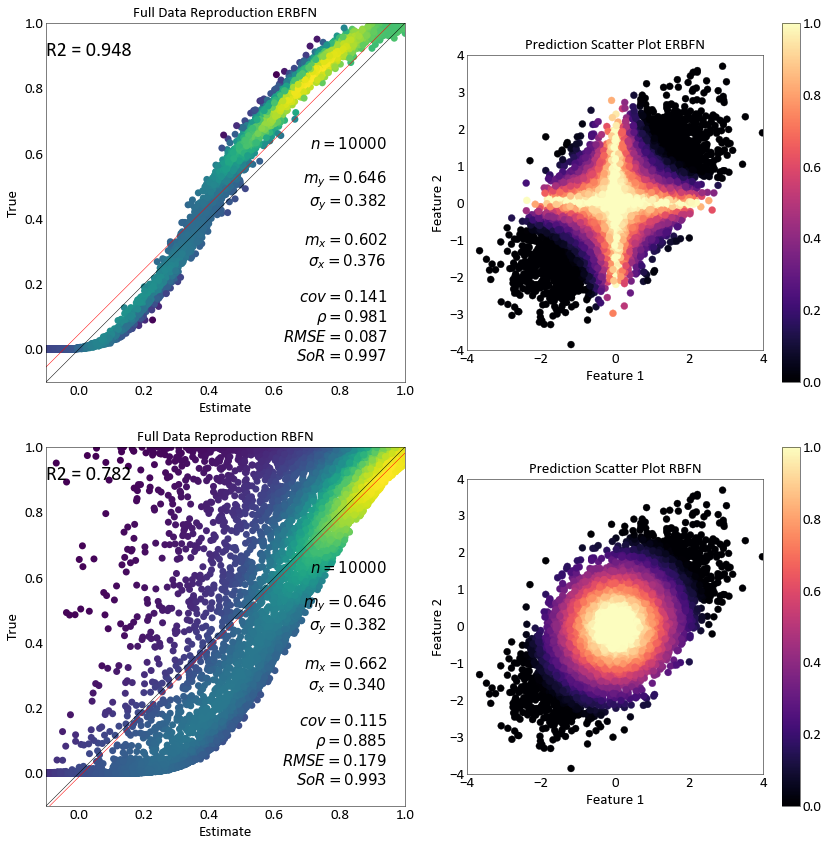

In [19]:
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
gs.set_style('pt15')
f, axes = plt.subplots(2, 2, figsize=(12, 12))
im = gs.scatxval(pd.DataFrame(pred_all_ERBFN[0:10000,:]),pd.DataFrame(z),dens=True,ax= axes[0,0], title ='Full Data Reproduction ERBFN')
im2 = axes[0,1].scatter(x,y,c = np.reshape(pred_all_ERBFN[0:10000,:],[len(pred_all_RBFN[0:10000,:])]),
            cmap='magma',vmin = 0, vmax = 1)
axes[0,1].set_title('Prediction Scatter Plot ERBFN')
axes[0,1].set(xlabel='Feature 1', ylabel='Feature 2')
axes[0,0].text(-0.1,0.9,'R2 = {0:.3f}'.format(r2_score(pd.DataFrame(z),pred_all_ERBFN[0:10000,:])),size=20)

im3 = gs.scatxval(pd.DataFrame(pred_all_RBFN[0:10000,:]),pd.DataFrame(z),dens=True,ax=axes[1,0], title ='Full Data Reproduction RBFN')
im4 = axes[1,1].scatter(x,y,c = np.reshape(pred_all_RBFN[0:10000,:],[len(pred_all_RBFN[0:10000,:])]),
            cmap='magma',vmin = 0, vmax = 1)
axes[1,1].set_title('Prediction Scatter Plot RBFN')
axes[1,1].set(xlabel='Feature 1', ylabel='Feature 2')
axes[1,0].text(-0.1,0.9,'R2 = {0:.3f}'.format(r2_score(pd.DataFrame(z),pred_all_RBFN[0:10000,:])),size=20)

plt.colorbar(im2, ax=axes[0,1])
plt.colorbar(im4, ax=axes[1,1])

axes[0,0].set_ylim([-0.1,1])
axes[0,0].set_xlim([-0.1,1])
axes[0,1].set_ylim([-4,4])
axes[0,1].set_xlim([-4,4])
axes[1,0].set_ylim([-0.1,1])
axes[1,0].set_xlim([-0.1,1])
axes[1,1].set_ylim([-4,4])
axes[1,1].set_xlim([-4,4])

axes[0,0].set_aspect('equal', 'box')
axes[0,1].set_aspect('equal', 'box')
axes[1,0].set_aspect('equal', 'box')
axes[1,1].set_aspect('equal', 'box')
plt.tight_layout()
plt.savefig('C:/Users/Matt/Desktop/Thesis Work/Thesis/0-Figures/3-Chapter/RBFN_EBFN.png')
plt.show()